In [3]:
!pip install torch torchvision torchaudio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 MB 55.0 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 61.1 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 54.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 54.9 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.12
    Uninstalling sympy-1.12:
      Successfully uninstalled sympy-1.12


In [5]:
!pip install timm matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 926.0 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 22.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.8/381.8 kB 27.4 MB/s eta 0:00:00


In [7]:
import torch
import torchvision
import timm
import matplotlib.pyplot as plt

print("Libraries loaded successfully!")


Libraries loaded successfully!


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from timm import create_model


In [11]:
# Define transformations for data augmentation
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 170M/170M [00:04<00:00, 37.8MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [13]:
model = create_model('resnet18', pretrained=True, num_classes=10)
model = model.to('cuda' if torch.cuda.is_available() else 'cpu')


model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

In [15]:
!pip install ipywidgets --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 40.9 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab-widgets 1.0.0
    Uninstalling jupyterlab-widgets-1.0.0:
      Successfully uninstalled jupyterlab-widgets-1.0.0
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.8.1
    Uninstalling ipywidgets-7.8.1:
      Successfully uninstalled ipywidgets-7.8.1


In [17]:
model = create_model('resnet18', pretrained=True, num_classes=10)
model = model.to('cuda' if torch.cuda.is_available() else 'cpu')


In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)


In [43]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=5):  # Reduced to 5 epochs
    # Define device inside the function
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)  # Move model to the device

    train_acc_history, val_acc_history = [], []
    train_loss_history, val_loss_history = [], []

    for epoch in range(num_epochs):
        start_time = time.time()  # Start timing the epoch

        # Training Phase
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        train_acc = 100. * correct / total
        train_acc_history.append(train_acc)
        train_loss_history.append(running_loss / len(trainloader))

        # Validation Phase
        model.eval()
        val_loss, correct, total = 0.0, 0, 0
        with torch.no_grad():
            for inputs, labels in testloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()

        val_acc = 100. * correct / total
        val_acc_history.append(val_acc)
        val_loss_history.append(val_loss / len(testloader))

        # Print epoch summary and time taken
        epoch_time = time.time() - start_time
        print(f"Epoch {epoch+1}/{num_epochs}, "
              f"Train Loss: {train_loss_history[-1]:.4f}, "
              f"Val Loss: {val_loss_history[-1]:.4f}, "
              f"Train Acc: {train_acc:.2f}%, "
              f"Val Acc: {val_acc:.2f}%, "
              f"Time: {epoch_time:.2f} sec")

        scheduler.step()

    # Check if lists are populated
    print("Training Accuracy History:", train_acc_history)
    print("Validation Accuracy History:", val_acc_history)
    print("Training Loss History:", train_loss_history)
    print("Validation Loss History:", val_loss_history)
    
    return train_acc_history, val_acc_history, train_loss_history, val_loss_history



In [45]:
train_acc, val_acc, train_loss, val_loss = train_model(model, criterion, optimizer, scheduler, num_epochs=5)


Epoch 1/5, Train Loss: 0.6351, Val Loss: 0.5899, Train Acc: 78.16%, Val Acc: 79.64%, Time: 371.22 sec
Epoch 2/5, Train Loss: 0.5702, Val Loss: 0.5283, Train Acc: 80.42%, Val Acc: 81.79%, Time: 354.71 sec
Epoch 3/5, Train Loss: 0.5268, Val Loss: 0.5039, Train Acc: 81.74%, Val Acc: 83.01%, Time: 356.40 sec
Epoch 4/5, Train Loss: 0.4954, Val Loss: 0.4894, Train Acc: 82.84%, Val Acc: 83.50%, Time: 358.81 sec
Epoch 5/5, Train Loss: 0.4673, Val Loss: 0.5176, Train Acc: 83.63%, Val Acc: 82.96%, Time: 355.66 sec
Training Accuracy History: [78.164, 80.424, 81.738, 82.84, 83.634]
Validation Accuracy History: [79.64, 81.79, 83.01, 83.5, 82.96]
Training Loss History: [0.6350842127790841, 0.5701518115942436, 0.5268070773624093, 0.4953581117989157, 0.4673452932968774]
Validation Loss History: [0.5899090742229656, 0.5282779725114252, 0.5039255489019832, 0.4893863524790782, 0.5176421536761484]


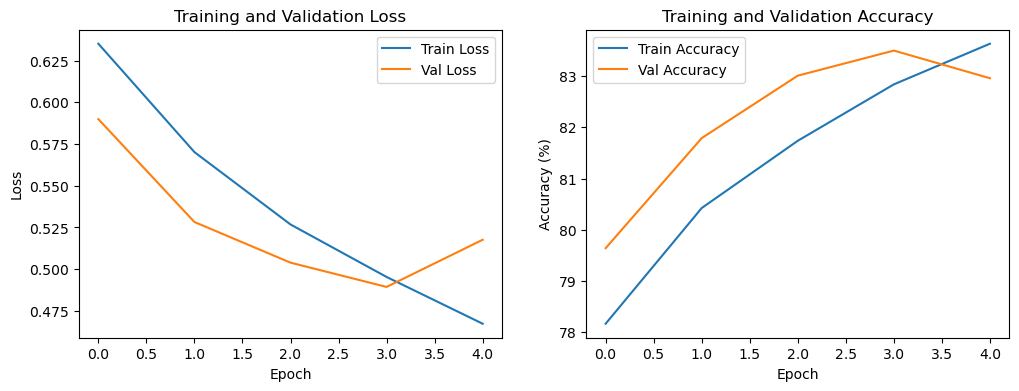

In [47]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [53]:
!pip install onnx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 63.8 MB/s eta 0:00:0000:0100:01


In [55]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
dummy_input = torch.randn(1, 3, 32, 32, device=device)
torch.onnx.export(model, dummy_input, "cifar10_model.onnx", verbose=True)


Exported graph: graph(%input.1 : Float(1, 3, 32, 32, strides=[3072, 1024, 32, 1], requires_grad=0, device=cpu),
      %fc.weight : Float(10, 512, strides=[512, 1], requires_grad=1, device=cpu),
      %fc.bias : Float(10, strides=[1], requires_grad=1, device=cpu),
      %onnx::Conv_193 : Float(64, 3, 7, 7, strides=[147, 49, 7, 1], requires_grad=0, device=cpu),
      %onnx::Conv_194 : Float(64, strides=[1], requires_grad=0, device=cpu),
      %onnx::Conv_196 : Float(64, 64, 3, 3, strides=[576, 9, 3, 1], requires_grad=0, device=cpu),
      %onnx::Conv_197 : Float(64, strides=[1], requires_grad=0, device=cpu),
      %onnx::Conv_199 : Float(64, 64, 3, 3, strides=[576, 9, 3, 1], requires_grad=0, device=cpu),
      %onnx::Conv_200 : Float(64, strides=[1], requires_grad=0, device=cpu),
      %onnx::Conv_202 : Float(64, 64, 3, 3, strides=[576, 9, 3, 1], requires_grad=0, device=cpu),
      %onnx::Conv_203 : Float(64, strides=[1], requires_grad=0, device=cpu),
      %onnx::Conv_205 : Float(64, 64

In [57]:
import time

model.eval()
with torch.no_grad():
    start_time = time.time()
    for _ in range(100):  # Run inference 100 times
        _ = model(dummy_input)
    end_time = time.time()

avg_inference_time = (end_time - start_time) / 100
print(f"Average inference time: {avg_inference_time:.6f} seconds")


Average inference time: 0.003151 seconds


In [59]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import seaborn as sns
from sklearn.metrics import confusion_matrix


Files already downloaded and verified


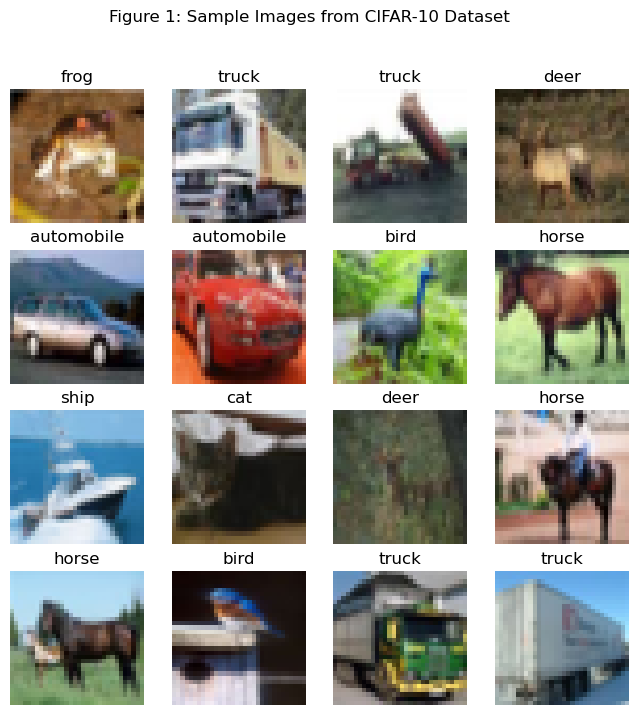

In [61]:
# Load CIFAR-10 dataset
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
cifar10 = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Display a grid of sample images
def show_cifar10_samples(dataset, num_images=16):
    plt.figure(figsize=(8, 8))
    for i in range(num_images):
        plt.subplot(4, 4, i + 1)
        image, label = dataset[i]
        plt.imshow(image.permute(1, 2, 0))  # Convert from (C, H, W) to (H, W, C)
        plt.title(cifar10.classes[label])
        plt.axis('off')
    plt.suptitle("Figure 1: Sample Images from CIFAR-10 Dataset")
    plt.show()

show_cifar10_samples(cifar10)


In [67]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Lists to store true labels and predictions
y_true = []
y_pred = []

# Set the model to evaluation mode
model.eval()
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = outputs.max(1)
        
        # Collect predictions and true labels
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)


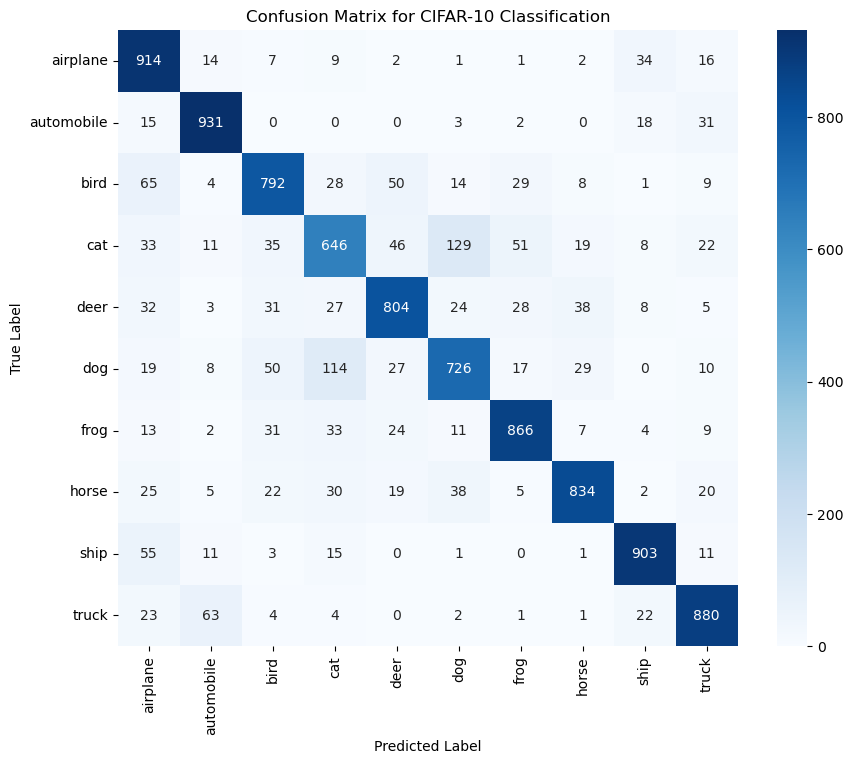

In [68]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=testset.classes, yticklabels=testset.classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for CIFAR-10 Classification")
plt.show()


In [83]:
import torch
import torch.nn as nn
import torch.optim as optim
from timm import create_model

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define Model 2 (MobileNetV2)
model2 = create_model('mobilenetv2_100', pretrained=True, num_classes=10)
model2 = model2.to(device)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Configure the optimizer (SGD with learning rate and momentum)
optimizer2 = optim.SGD(model2.parameters(), lr=0.01, momentum=0.8)

# Define a learning rate scheduler, if needed
scheduler2 = optim.lr_scheduler.StepLR(optimizer2, step_size=5, gamma=0.5)


In [87]:
# Initialize lists to store training and validation accuracy and loss
train_acc_model2, val_acc_model2 = [], []
train_loss_model2, val_loss_model2 = [], []

num_epochs = 5  # Adjust the number of epochs as needed

for epoch in range(num_epochs):
    # Training phase
    model2.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer2.zero_grad()
        outputs = model2(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer2.step()
        
        # Calculate running loss and accuracy
        running_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        correct_train += predicted.eq(labels).sum().item()
        total_train += labels.size(0)
    
    train_loss = running_loss / total_train
    train_acc = 100 * correct_train / total_train
    train_loss_model2.append(train_loss)
    train_acc_model2.append(train_acc)

    # Validation phase
    model2.eval()
    val_running_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model2(inputs)
            
            loss = criterion(outputs, labels)
            val_running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            correct_val += predicted.eq(labels).sum().item()
            total_val += labels.size(0)
    
    val_loss = val_running_loss / total_val
    val_acc = 100 * correct_val / total_val
    val_loss_model2.append(val_loss)
    val_acc_model2.append(val_acc)

    # Step the scheduler
    scheduler2.step()

    # Print progress for each epoch
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')


Epoch 1/5, Train Loss: 1.9395, Train Acc: 31.71%, Val Loss: 1.5595, Val Acc: 43.92%
Epoch 2/5, Train Loss: 1.5539, Train Acc: 44.07%, Val Loss: 1.3502, Val Acc: 51.59%
Epoch 3/5, Train Loss: 1.3921, Train Acc: 50.41%, Val Loss: 1.1994, Val Acc: 57.92%
Epoch 4/5, Train Loss: 1.2521, Train Acc: 55.32%, Val Loss: 1.0973, Val Acc: 61.11%
Epoch 5/5, Train Loss: 1.1595, Train Acc: 58.84%, Val Loss: 1.0417, Val Acc: 63.39%


In [92]:
torch.save(model2.state_dict(), 'model2_weights.pth')


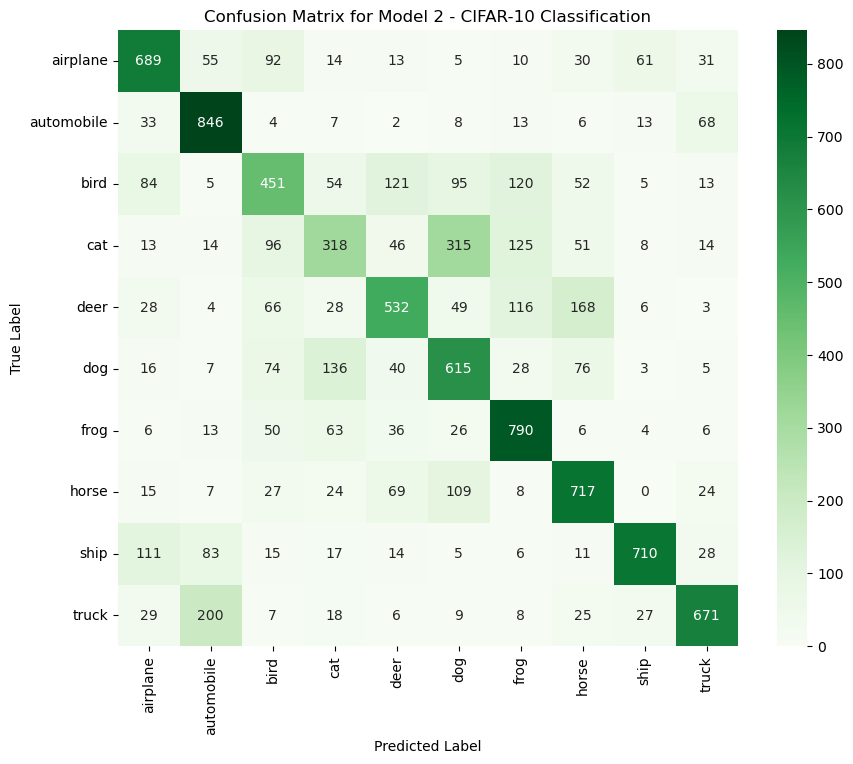

In [93]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Collect true labels and predictions for Model 2
y_true_model2 = []
y_pred_model2 = []

model2.eval()
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model2(inputs)
        _, predicted = outputs.max(1)
        
        y_true_model2.extend(labels.cpu().numpy())
        y_pred_model2.extend(predicted.cpu().numpy())

# Generate and plot the confusion matrix
conf_matrix_model2 = confusion_matrix(y_true_model2, y_pred_model2)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_model2, annot=True, fmt="d", cmap="Greens", 
            xticklabels=testset.classes, yticklabels=testset.classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Model 2 - CIFAR-10 Classification")
plt.show()


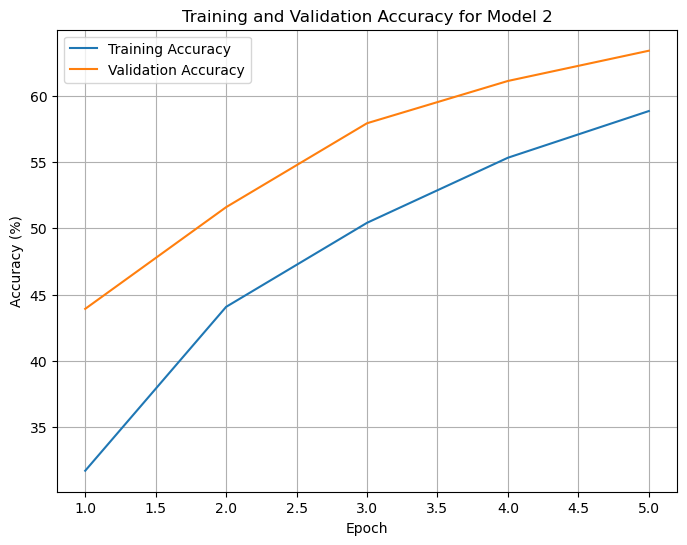

In [98]:
import matplotlib.pyplot as plt

# Epochs
epochs = range(1, 6)

# Accuracy values for training and validation from the output
train_acc_model2 = [31.71, 44.07, 50.41, 55.32, 58.84]
val_acc_model2 = [43.92, 51.59, 57.92, 61.11, 63.39]

# Plot Training and Validation Accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_acc_model2, label='Training Accuracy')
plt.plot(epochs, val_acc_model2, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy for Model 2')
plt.legend()
plt.grid(True)
plt.show()


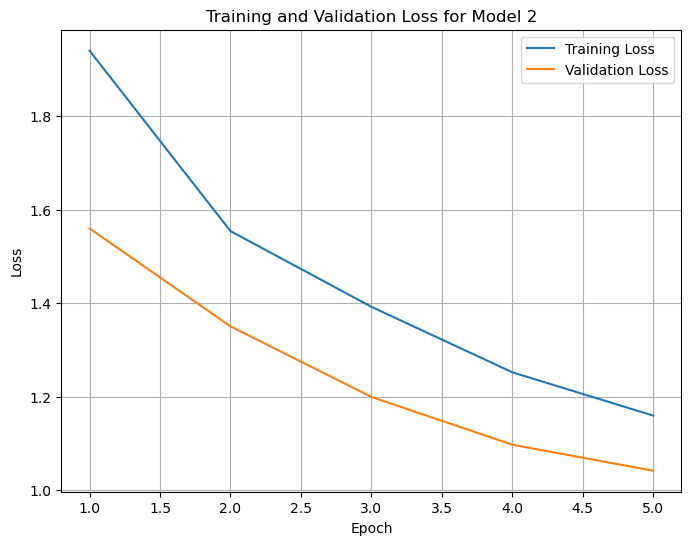

In [100]:
# Loss values for training and validation from the output
train_loss_model2 = [1.9395, 1.5539, 1.3921, 1.2521, 1.1595]
val_loss_model2 = [1.5595, 1.3502, 1.1994, 1.0973, 1.0417]

# Plot Training and Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss_model2, label='Training Loss')
plt.plot(epochs, val_loss_model2, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Model 2')
plt.legend()
plt.grid(True)
plt.show()
